In [2]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import h5py
import matplotlib.pyplot as plt
import matplotlib.dates as md
from scipy.optimize import leastsq,curve_fit
import math
import time
import datetime as dt
import pandas as pd
from sympy import Symbol
from sympy.solvers import solve
import sympy as sp

In [3]:
def open_data(exp_id):
    ## basic paths
    data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
    analysis_local_path='D:/Analysis/' # D:\ is local SSD in the main experiment computer
    analysis_master_path='Y:/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\
    experiment_file='results.hdf5'
    qdp_name='qdp.txt'

    exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
    exp_path=data_master_path+exp_date+'/'+exp_id+'/'
    analysis_path=analysis_master_path+exp_date+'/'+exp_id+'/'

    if not os.path.exists(analysis_path):
        os.makedirs(analysis_path)

    if os.path.isfile(analysis_path+qdp_name):
        print "Yay! found old qdp class. We can save time!"
        q = qdp.load_qdp(filename=analysis_path+qdp_name)
    else:
        print "Coudn't find processed qdp. Loading and saving"
        q = qdp.QDP(base_data_path=exp_path)
        q.load_data_file(experiment_file)
        q.save_qdp(filename=analysis_path+qdp_name)
    return q

def process_container(exp_id):
    q=open_data(exp_id)
    cuts=[[450],[450],[450]]
    for r in range(5):
        q.set_thresholds(cuts, roi=r)
    xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
    retention = q.apply_thresholds()
    
    e=0
    timestamp=[]
    xdata=[]
    reten={}
    err={}
    container={}
    for i in q.experiments[e]['iterations']:
        iter_timestamp=q.experiments[e]['iterations'][i]['timestamp_iteration']
        timestamp.append(iter_timestamp)
        xdata.append(np.squeeze(retention['ivar'])[i][0])
        for roi in [0,1,2,3,4]:
            if i==0:
                reten[str(roi)]=[]
                err[str(roi)]=[]
            reten[str(roi)].append(np.squeeze(retention['retention'])[i][roi])
            err[str(roi)].append(np.squeeze(retention['error'])[e][roi])

    dates=[dt.datetime.fromtimestamp(ts) for ts in timestamp]
    container['exp_id']=exp_id
    container['timestamps']=timestamp
    container['datetime']=dates
    container['xdata']=xdata
    container['retentions']=reten
    container['errors']=err
    container['qdp_class']=q
    return container

def flatten(l):
    flat_list = [item for sublist in l for item in sublist]
    return flat_list


def sin(t,amp,freq,phase,offset):
    res = (amp*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def decaying_sin(t,tau,amp,freq,phase,offset):
    res = (amp*np.exp(-t/tau)*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def est_freq(ydata,tgap,tau,amp,freq,phase,offset): # Estimation of frequency change (from dy/df where y=sinusoidal fit)
    res=(ydata-decaying_sin(tau,tgap,amp,freq,phase,offset))/(amp*np.exp(-tgap/tau)*2*np.pi*tgap*np.cos(2*np.pi*freq*tgap+phase))
    return res

def gaussian(x,amp,x0,sigma,offset):
    res=(amp*np.exp((-2.0*(x-x0)**2)/(sigma**2)))+offset
    return res


# Set experiment(s) to analyze


In [4]:
exp_ids=['2018_06_23_10_07_33_Open loop Ramsey, temperature controlled box',
         '2018_06_23_10_24_18_Open loop Ramsey, temperature controlled box',
         '2018_06_23_10_39_15_Open loop Ramsey, temperature controlled box',
         '2018_06_23_10_54_11_Open loop Ramsey, temperature controlled box',
         '2018_06_23_11_07_59_Open loop Ramsey, temperature controlled box',
         '2018_06_23_11_21_19_Open loop Ramsey, temperature controlled box',
         '2018_06_23_11_36_45_Open loop Ramsey, temperature controlled box',
         '2018_06_23_11_53_38_Open loop Ramsey, temperature controlled box',
         '2018_06_23_12_16_28_Open loop Ramsey, temperature controlled box',
         '2018_06_23_12_42_39_Open loop Ramsey, temperature controlled box',
         '2018_06_23_13_05_19_Open loop Ramsey, temperature controlled box',
         '2018_06_23_13_21_51_Open loop Ramsey, temperature controlled box',
         '2018_06_23_13_40_50_Open loop Ramsey, temperature controlled box',
         '2018_06_23_13_58_53_Open loop Ramsey, temperature controlled box',
         '2018_06_23_14_21_41_Open loop Ramsey, temperature controlled box'
         
]

In [5]:
assorted={}
assorted['qdp_class']=[]
assorted['exp_ids']=[]
assorted['timestamps']=[]
assorted['retentions']=[[],[],[],[],[]]
assorted['errors']=[[],[],[],[],[]]
for exp_id in exp_ids:
    container=process_container(exp_id)
    assorted['qdp_class'].append(container['qdp_class'])
    assorted['exp_ids'].append(container['exp_id'])
    assorted['timestamps'].append(container['timestamps'])
    for roi in [0,1,2,3,4]:
        assorted['retentions'][roi].append(container['retentions'][str(roi)])
        assorted['errors'][roi].append(container['errors'][str(roi)])


Yay! found old qdp class. We can save time!
qdp has been imported from :Y:/Analysis/2018_06_23/2018_06_23_10_07_33_Open loop Ramsey, temperature controlled box/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :Y:/Analysis/2018_06_23/2018_06_23_10_24_18_Open loop Ramsey, temperature controlled box/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :Y:/Analysis/2018_06_23/2018_06_23_10_39_15_Open loop Ramsey, temperature controlled box/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :Y:/Analysis/2018_06_23/2018_06_23_10_54_11_Open loop Ramsey, temperature controlled box/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :Y:/Analysis/2018_06_23/2018_06_23_11_07_59_Open loop Ramsey, temperature controlled box/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :Y:/Analysis/2018_06_23/2018_06_23_11_21_19_Open loop Ramsey, temperature controlled box/

# Experiment-wise analysis

2018_06_23_10_07_33_Open loop Ramsey, temperature controlled box
0


<IPython.core.display.Javascript object>


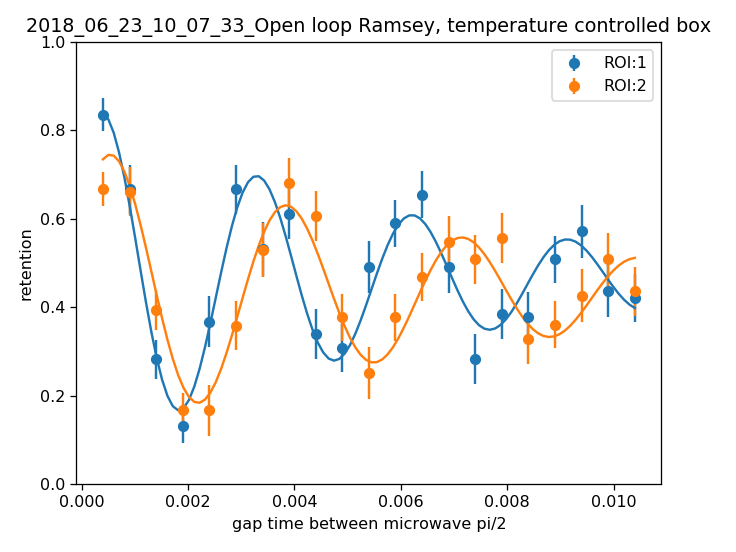

[0.017, 0.36206627011372733, 310, 1.5707963267948966, 0.4737546254086607]
tau 1  is  0.00612759502663  with 1 std of   0.00141466889871
amplitude 1  is  0.401071770685  with 1 std of   0.0540162212847
frequency 1  is  342.553407419  with 1 std of   6.77032037564
phase 1  is  0.698958676075  with 1 std of   0.166015853917
offset 1  is  0.46323534297  with 1 std of   0.01388188811
[0.017, 0.23532575131615124, 310, 1.5707963267948966, 0.44649243050203052]
tau 2  is  0.00723157692347  with 1 std of   0.00173839102681
amplitude 2  is  0.337865766004  with 1 std of   0.0440090916391
frequency 2  is  302.705462602  with 1 std of   6.24804953782
phase 2  is  0.477065779938  with 1 std of   0.164531122846
offset 2  is  0.432337250774  with 1 std of   0.0121531597407
2018_06_23_10_24_18_Open loop Ramsey, temperature controlled box
1


<IPython.core.display.Javascript object>


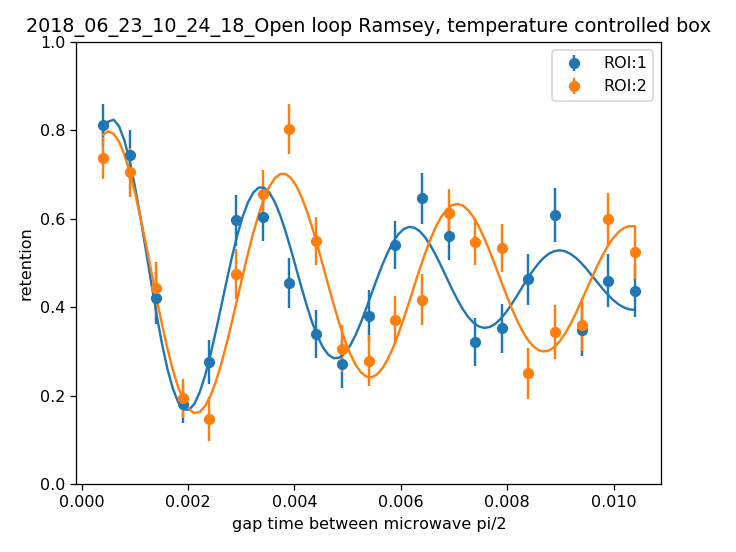

[0.017, 0.34503421103388165, 310, 1.5707963267948966, 0.46746578896611835]
tau 1  is  0.00530103575011  with 1 std of   0.00124945165297
amplitude 1  is  0.416392785647  with 1 std of   0.0613949448652
frequency 1  is  356.689505961  with 1 std of   7.96250033935
phase 1  is  0.203504243719  with 1 std of   0.17841656607
offset 1  is  0.45236708599  with 1 std of   0.0147400466353
[0.017, 0.33390310469331397, 310, 1.5707963267948966, 0.4693755838312762]
tau 2  is  0.0101224860611  with 1 std of   0.00282815518721
amplitude 2  is  0.362805295393  with 1 std of   0.0455361003317
frequency 2  is  305.348304377  with 1 std of   5.29064879071
phase 2  is  0.543257988194  with 1 std of   0.155778452668
offset 2  is  0.453153133847  with 1 std of   0.0136759327647
2018_06_23_10_39_15_Open loop Ramsey, temperature controlled box
2


<IPython.core.display.Javascript object>

[0.017, 0.27840704333805089, 310, 1.5707963267948966, 0.46786161337836707]
tau 1  is  0.00663710058681  with 1 std of   0.00165827565301
amplitude 1  is  0.372738247987  with 1 std of   0.05264091346
frequency 1  is  350.729121602  with 1 std of   6.90648441729
phase 1  is  0.517312288589  with 1 std of   0.174846829795
offset 1  is  0.457394954291  with 1 std of   0.0139586541773
[0.017, 0.37681918528031705, 310, 1.5707963267948966, 0.45651414805301632]
tau 2  is  0.00368995724991  with 1 std of   0.000684571063256
amplitude 2  is  0.470641810368  with 1 std of   0.0583182263915
frequency 2  is  298.573803182  with 1 std of   9.44236942151
phase 2  is  0.445943428735  with 1 std of   0.171733173586
offset 2  is  0.43718813539  with 1 std of   0.0126524189968
2018_06_23_10_54_11_Open loop Ramsey, temperature controlled box
3


<IPython.core.display.Javascript object>


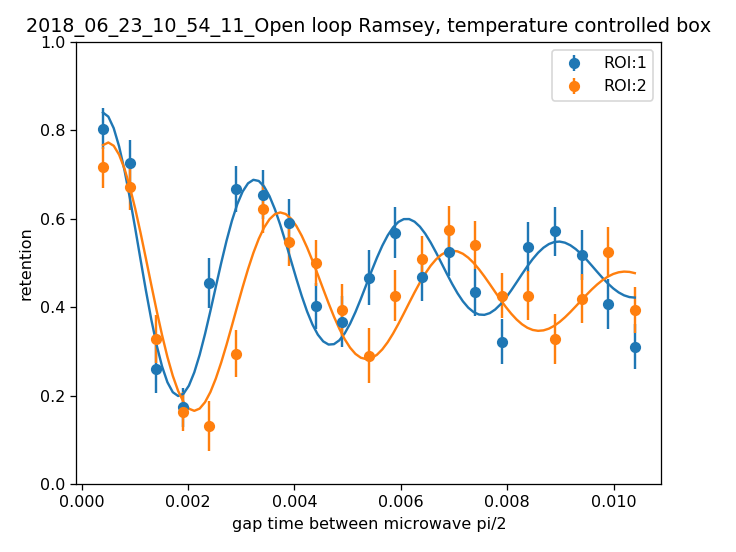

[0.017, 0.31702374785850679, 310, 1.5707963267948966, 0.48689782076894422]
tau 1  is  0.00528489423528  with 1 std of   0.00129340488831
amplitude 1  is  0.393628871772  with 1 std of   0.0595535856653
frequency 1  is  350.236080254  with 1 std of   8.55510598575
phase 1  is  0.608443470621  with 1 std of   0.192815644065
offset 1  is  0.476536610633  with 1 std of   0.014719833674
[0.017, 0.27719859316897916, 310, 1.5707963267948966, 0.43946807349768752]
tau 2  is  0.00536448496156  with 1 std of   0.00122881378343
amplitude 2  is  0.384551024906  with 1 std of   0.0542481708678
frequency 2  is  308.565889175  with 1 std of   8.17120395234
phase 2  is  0.514883019723  with 1 std of   0.186133304209
offset 2  is  0.423507607159  with 1 std of   0.0137283896277
2018_06_23_11_07_59_Open loop Ramsey, temperature controlled box
4


<IPython.core.display.Javascript object>


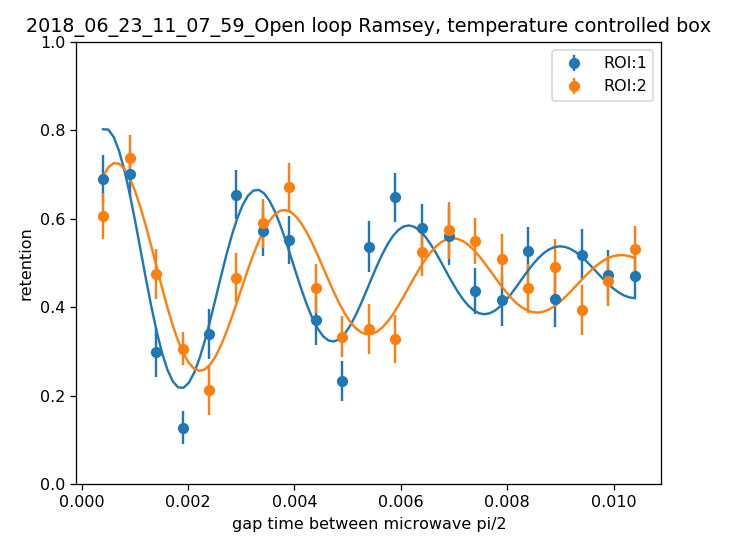

[0.017, 0.2197507280579627, 310, 1.5707963267948966, 0.48200365790694955]
tau 1  is  0.00530952791158  with 1 std of   0.00160727241132
amplitude 1  is  0.363557952146  with 1 std of   0.0678067576062
frequency 1  is  350.898139136  with 1 std of   10.5055015393
phase 1  is  0.50200061651  with 1 std of   0.237658952984
offset 1  is  0.471110857981  with 1 std of   0.0167922020415
[0.017, 0.26162272418221666, 310, 1.5707963267948966, 0.47608219385057027]
tau 2  is  0.006162883388  with 1 std of   0.00188608229421
amplitude 2  is  0.295459062573  with 1 std of   0.0538160902706
frequency 2  is  315.638812485  with 1 std of   9.09379788013
phase 2  is  0.21948165431  with 1 std of   0.220626936986
offset 2  is  0.461127307971  with 1 std of   0.0136599848631
2018_06_23_11_21_19_Open loop Ramsey, temperature controlled box
5


<IPython.core.display.Javascript object>

[0.017, 0.2672671859820106, 310, 1.5707963267948966, 0.48683117467372705]
tau 1  is  0.00527375395352  with 1 std of   0.00141828740263
amplitude 1  is  0.364512715268  with 1 std of   0.060122229052
frequency 1  is  344.020659225  with 1 std of   9.2354694213
phase 1  is  0.522239603276  with 1 std of   0.20972244009
offset 1  is  0.474865023613  with 1 std of   0.014825574279
[0.017, 0.35592882691038052, 310, 1.5707963267948966, 0.45052278599284523]
tau 2  is  0.00415594050216  with 1 std of   0.000835209200449
amplitude 2  is  0.379655677727  with 1 std of   0.0507037672856
frequency 2  is  313.235062465  with 1 std of   9.04508223339
phase 2  is  0.343996727615  with 1 std of   0.176279930544
offset 2  is  0.433682686933  with 1 std of   0.011367232602
2018_06_23_11_36_45_Open loop Ramsey, temperature controlled box
6


<IPython.core.display.Javascript object>

[0.017, 0.31449436937974229, 310, 1.5707963267948966, 0.48550563062025776]
tau 1  is  0.00686058642438  with 1 std of   0.00189116092487
amplitude 1  is  0.363392484091  with 1 std of   0.0558282383616
frequency 1  is  342.428869434  with 1 std of   7.1723946271
phase 1  is  0.769555978279  with 1 std of   0.184938911999
offset 1  is  0.47725514236  with 1 std of   0.014730314965
[0.017, 0.27112387261438742, 310, 1.5707963267948966, 0.45387612738561256]
tau 2  is  0.00758870627472  with 1 std of   0.00250098338872
amplitude 2  is  0.334019697352  with 1 std of   0.0578572291418
frequency 2  is  318.196695882  with 1 std of   7.95371015457
phase 2  is  0.583623746788  with 1 std of   0.215240704874
offset 2  is  0.438836206271  with 1 std of   0.0160304152312
2018_06_23_11_53_38_Open loop Ramsey, temperature controlled box
7


<IPython.core.display.Javascript object>


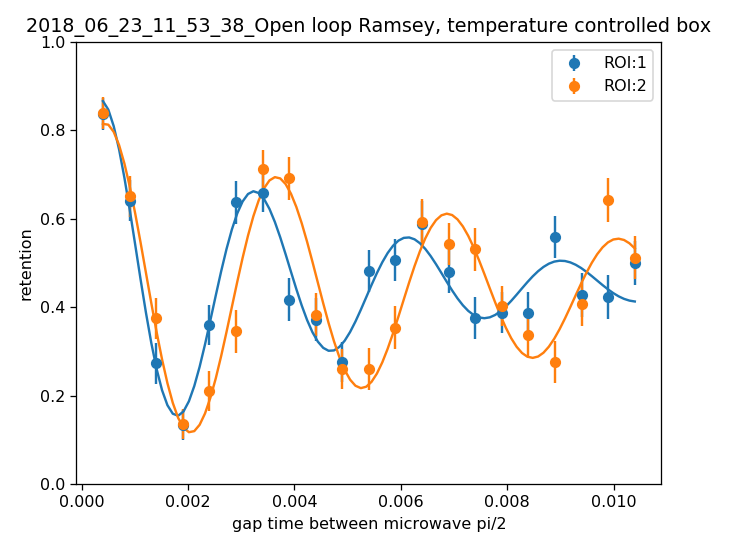

[0.017, 0.37508598053863551, 310, 1.5707963267948966, 0.46275185729920232]
tau 1  is  0.00423890550413  with 1 std of   0.000685439511439
amplitude 1  is  0.456132600493  with 1 std of   0.0483901744592
frequency 1  is  346.414241309  with 1 std of   7.0749447105
phase 1  is  0.697764678201  with 1 std of   0.139492318848
offset 1  is  0.451046812805  with 1 std of   0.010998338541
[0.017, 0.38910611258213051, 310, 1.5707963267948966, 0.45040006025737561]
tau 2  is  0.00843912846606  with 1 std of   0.00182666287208
amplitude 2  is  0.403891106901  with 1 std of   0.0438379209677
frequency 2  is  311.038670862  with 1 std of   4.86914538015
phase 2  is  0.651952770448  with 1 std of   0.135614506569
offset 2  is  0.432910993247  with 1 std of   0.0125737889164
2018_06_23_12_16_28_Open loop Ramsey, temperature controlled box
8


<IPython.core.display.Javascript object>

[0.017, 0.416269755705786, 310, 1.5707963267948966, 0.44087310143707109]
tau 1  is  0.00702792227302  with 1 std of   0.00154276197901
amplitude 1  is  0.405211293252  with 1 std of   0.0480963241716
frequency 1  is  335.632418784  with 1 std of   5.42114176694
phase 1  is  0.650168536611  with 1 std of   0.143711540587
offset 1  is  0.427249625655  with 1 std of   0.0128433979197
[0.017, 0.31546140470169926, 310, 1.5707963267948966, 0.43762501505138718]
tau 2  is  0.0106013732235  with 1 std of   0.00165808631446
amplitude 2  is  0.345282047311  with 1 std of   0.0229904529686
frequency 2  is  320.383170335  with 1 std of   2.55760046346
phase 2  is  0.743913662468  with 1 std of   0.0782264946192
offset 2  is  0.422432636326  with 1 std of   0.006753373347
2018_06_23_12_42_39_Open loop Ramsey, temperature controlled box
9


<IPython.core.display.Javascript object>

[0.017, 0.30843208076472811, 310, 1.5707963267948966, 0.47823458590193851]
tau 1  is  0.0106080940346  with 1 std of   0.00371375818809
amplitude 1  is  0.344665607537  with 1 std of   0.050970608789
frequency 1  is  332.660288788  with 1 std of   5.52983716861
phase 1  is  0.714454801108  with 1 std of   0.170803288991
offset 1  is  0.465773337639  with 1 std of   0.0148684267212
[0.017, 0.35341548367514009, 310, 1.5707963267948966, 0.43670797311498333]
tau 2  is  0.00717910557243  with 1 std of   0.00152522170337
amplitude 2  is  0.372624851184  with 1 std of   0.0433282235691
frequency 2  is  312.715766706  with 1 std of   5.36346573666
phase 2  is  0.88339380465  with 1 std of   0.140665328748
offset 2  is  0.424465404754  with 1 std of   0.0115946564708
2018_06_23_13_05_19_Open loop Ramsey, temperature controlled box
10


<IPython.core.display.Javascript object>

[0.017, 0.28251128656457902, 310, 1.5707963267948966, 0.47091337096966757]
tau 1  is  0.00563572573356  with 1 std of   0.00116869325582
amplitude 1  is  0.412012247477  with 1 std of   0.0510975909601
frequency 1  is  341.640557463  with 1 std of   6.60103195969
phase 1  is  0.564484396562  with 1 std of   0.155903677369
offset 1  is  0.457503482976  with 1 std of   0.0128635736271
[0.017, 0.36309667197201062, 310, 1.5707963267948966, 0.43937246383045853]
tau 2  is  0.00894528633611  with 1 std of   0.00206038569468
amplitude 2  is  0.362351211595  with 1 std of   0.0401783653299
frequency 2  is  314.48236829  with 1 std of   4.71872948696
phase 2  is  0.738346463379  with 1 std of   0.134978180623
offset 2  is  0.424129730374  with 1 std of   0.0115305966144
2018_06_23_13_21_51_Open loop Ramsey, temperature controlled box
11


<IPython.core.display.Javascript object>

[0.017, 0.27663917851967645, 310, 1.5707963267948966, 0.50113859925810134]
tau 1  is  0.00656845058679  with 1 std of   0.00150731647692
amplitude 1  is  0.377163874357  with 1 std of   0.0481376244159
frequency 1  is  332.718102428  with 1 std of   6.06852067193
phase 1  is  0.516228740175  with 1 std of   0.156526928922
offset 1  is  0.485819182918  with 1 std of   0.0126527105136
[0.017, 0.32509957762087066, 310, 1.5707963267948966, 0.48740042237912934]
tau 2  is  0.00720898633823  with 1 std of   0.00160857279732
amplitude 2  is  0.389789486102  with 1 std of   0.0475693439999
frequency 2  is  309.373900033  with 1 std of   5.85352239777
phase 2  is  0.764682462958  with 1 std of   0.15324182459
offset 2  is  0.47300495885  with 1 std of   0.0130406301182
2018_06_23_13_40_50_Open loop Ramsey, temperature controlled box
12


<IPython.core.display.Javascript object>

[0.017, 0.32306745075918059, 310, 1.5707963267948966, 0.46154793385620402]
tau 1  is  0.00571282041349  with 1 std of   0.00112873619254
amplitude 1  is  0.467743961658  with 1 std of   0.0548718396627
frequency 1  is  335.990731478  with 1 std of   6.10960296164
phase 1  is  0.672868417992  with 1 std of   0.145998669073
offset 1  is  0.44687642125  with 1 std of   0.0138066384329
[0.017, 0.40850916247257701, 310, 1.5707963267948966, 0.48037972641631183]
tau 2  is  0.00732062731718  with 1 std of   0.00103737283197
amplitude 2  is  0.43413249033  with 1 std of   0.0333403858885
frequency 2  is  309.341436515  with 1 std of   3.70711884534
phase 2  is  0.537861163684  with 1 std of   0.0976975923843
offset 2  is  0.461253498897  with 1 std of   0.00925994921522
2018_06_23_13_58_53_Open loop Ramsey, temperature controlled box
13


<IPython.core.display.Javascript object>


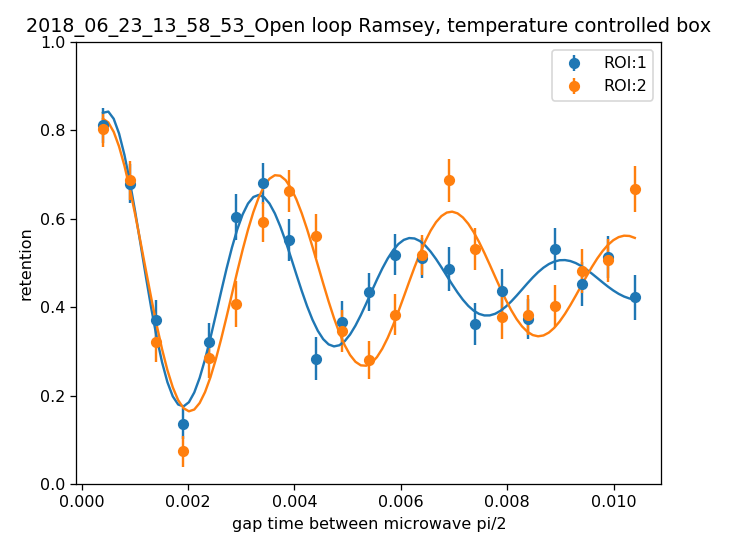

[0.017, 0.34282850248064572, 310, 1.5707963267948966, 0.46876570041790505]
tau 1  is  0.00428442235696  with 1 std of   0.000661192787076
amplitude 1  is  0.436527928464  with 1 std of   0.0439051710567
frequency 1  is  349.403216502  with 1 std of   6.65172614562
phase 1  is  0.44601508018  with 1 std of   0.132349253897
offset 1  is  0.454182240908  with 1 std of   0.010040501852
[0.017, 0.32845763619713086, 310, 1.5707963267948966, 0.47401149960533828]
tau 2  is  0.00769099377261  with 1 std of   0.00176814932878
amplitude 2  is  0.386006655188  with 1 std of   0.04705508522
frequency 2  is  304.806861617  with 1 std of   5.72670392212
phase 2  is  0.758229795679  with 1 std of   0.153466283997
offset 2  is  0.460088356191  with 1 std of   0.0132118128721
2018_06_23_14_21_41_Open loop Ramsey, temperature controlled box
14


<IPython.core.display.Javascript object>

[0.017, 0.34731205644119217, 310, 1.5707963267948966, 0.4860212768921412]
tau 1  is  0.00509313723424  with 1 std of   0.000751246556834
amplitude 1  is  0.466726255621  with 1 std of   0.0428732105014
frequency 1  is  346.083781885  with 1 std of   5.19233586215
phase 1  is  0.3599077408  with 1 std of   0.115316920592
offset 1  is  0.468613311512  with 1 std of   0.0103315107798
[0.017, 0.33915719383438186, 310, 1.5707963267948966, 0.45352573299488647]
tau 2  is  0.00823084864303  with 1 std of   0.00250637096341
amplitude 2  is  0.386046199515  with 1 std of   0.0596051940803
frequency 2  is  314.126960976  with 1 std of   6.95772442686
phase 2  is  0.56379303879  with 1 std of   0.192677479013
offset 2  is  0.435574593339  with 1 std of   0.0169593945351


In [6]:
save_figures=False
data11 = []
for n in range(0,len(assorted['exp_ids'])):    
    print assorted['exp_ids'][n]
    assorted_roi3freqs=[]
    assorted_roi2freqs=[]
    assorted_roi3perr=[]
    assorted_roi2perr=[]
    i = n
    print i
    exp_id=assorted['exp_ids'][i]
    q=assorted['qdp_class'][i]
    q.experiments[0]['variable_list']
    xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
    q.get_thresholds()
    retention = q.apply_thresholds()


    colors=[ '#ff7f0e','#1f77b4','#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    fig, ax = plt.subplots()
    fit_guesses=[0.006, 0.43, 409 ,1.107, 0.47]
    #fit_guesses2=[  0.522, 0.411, 190 ,1.52, 0.5]
    #roi_dependency=[0,0,0,0,0]
    fitted_parameters=[]
    freqarray = []
    for roi in [1,2]:
        error=0
        data = []
        reten = []
        err = []

        for e in range(len(np.squeeze(retention['ivar']))):
            data.append(np.squeeze(retention['ivar'])[e][roi])
            reten.append(np.squeeze(retention['retention'])[e][roi])
            err.append(np.squeeze(retention['error'])[e][roi])
        offsetguess = np.mean(reten)
        Ampguess = np.max(reten)-offsetguess
        fit_guesses = [0.017,Ampguess , 310 ,np.pi/2, offsetguess]   
        print fit_guesses
        ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',color=colors[roi])
        #guesses=np.add(fit_guesses,np.ones(len(fit_guesses))*(roi-2)*roi_dependency)
        #try:
       # decaying_sin(t,tau,amp,freq,phase,offset)
        try:
            fit,pcov = curve_fit(decaying_sin,data,reten,fit_guesses) #gaussian(x,amp,x0,sigma,offset):
            perr = np.sqrt(np.diag(pcov))
            print 'tau',roi," is ", fit[0]," with 1 std of  ", perr[0]
            print 'amplitude',roi," is ", fit[1]," with 1 std of  ", perr[1]
            print 'frequency',roi," is ", fit[2]," with 1 std of  ", perr[2]
            print 'phase', roi," is ", fit[3]," with 1 std of  ", perr[3]
            print 'offset',roi," is ", fit[4]," with 1 std of  ", perr[4]
            freqarray.append(fit[2])
            freqarray.append(perr[2])

        except:
            fit,pcov = curve_fit(decaying_sin,data,reten,fit_guesses2) #gaussian(x,amp,x0,sigma,offset):
            perr = np.sqrt(np.diag(pcov))
            print 'tau',roi," is ", fit[0]," with 1 std of  ", perr[0]
            print 'amplitude',roi," is ", fit[1]," with 1 std of  ", perr[1]
            print 'frequency',roi," is ", fit[2]," with 1 std of  ", perr[2]
            print 'phase', roi," is ", fit[3]," with 1 std of  ", perr[3]
            print 'offsett',roi," is ", fit[4]," with 1 std of  ", perr[4]
            freqarray.append(fit[2])
            freqarray.append(perr[2])

           #fit2,pcov2 = curve_fit(gaussian,data,reten,fit_guesses2) #gaussian(x,amp,x0,sigma,offset):
       # except RuntimeError:
       #     error=1
    #     if error is not 1:
    #         print "amplitude: {} , x0: {}, sigma:{} ".format(fit[0],fit[1],fit[2])
    #         print "amplitude: {} , x0: {}, sigma:{} ".format(fit2[0],fit2[1],fit2[2])

        xarray=np.linspace(np.min(data),np.max(data),100)
        yfit=decaying_sin(xarray, fit[0], fit[1], fit[2], fit[3],fit[4])
       # yfit2=decaying_sin(xarray, 0.522, 0.411, 190 ,1.52, 0.5)
        plt.plot(xarray,yfit,color=colors[roi])
       # plt.plot(xarray,yfit2,color=colors[roi])
           # yfit2=gaussian(xarray, fit2[0], fit2[1], fit2[2], fit2[3])
            #plt.plot(xarray,yfit,label="mj=5/2", color=colors[0])
            #plt.plot(xarray,yfit2,label="mj=3/2", color=colors[1])

    #         if roi==3:
    #             assorted_roi3freqs.append(fit[2])
    #             assorted_roi3perr.append(np.sqrt(pcov[2][2]))
    #         elif roi==2:
    #             assorted_roi2freqs.append(fit[2])
    #             assorted_roi2perr.append(np.sqrt(pcov[2][2]))

    ax.set_title(exp_id)
    ax.set_ylim(0, 1)
    ax.set_xlabel(xlab)
    ax.set_ylabel('retention')
    ax.legend()
    plt.tight_layout()
    plt.show()
    if save_figures:
        plt.savefig('{}.pdf'.format(exp_id))
    
    
    
    starting_time = dt.datetime.fromtimestamp(int(assorted['timestamps'][i][0])).strftime('%Y-%m-%d %H:%M:%S')
    end_time = dt.datetime.fromtimestamp(int(assorted['timestamps'][i][len(assorted['timestamps'][i])-1])).strftime('%Y-%m-%d %H:%M:%S')
    middle_time = dt.datetime.fromtimestamp(0.5*int(assorted['timestamps'][i][0]+assorted['timestamps'][i][-1])).strftime('%Y-%m-%d %H:%M:%S')
    time_length = (assorted['timestamps'][i][len(assorted['timestamps'][i])-1])-assorted['timestamps'][i][0]
    time_from_data_start = ((assorted['timestamps'][i][0]+assorted['timestamps'][i][len(assorted['timestamps'][i])-1])/2 ) - assorted['timestamps'][0][0] 
    data11.append([ starting_time,end_time,freqarray[0],freqarray[1],freqarray[2],freqarray[3],middle_time,time_length,time_from_data_start])



<IPython.core.display.Javascript object>


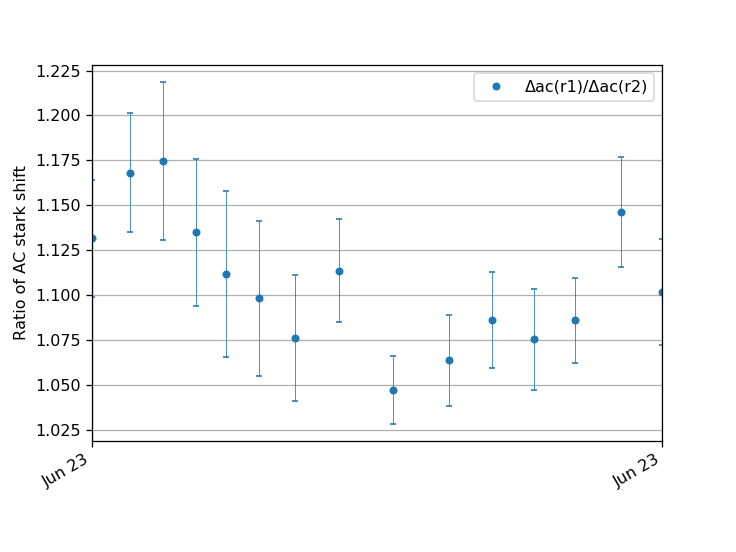

<IPython.core.display.Javascript object>


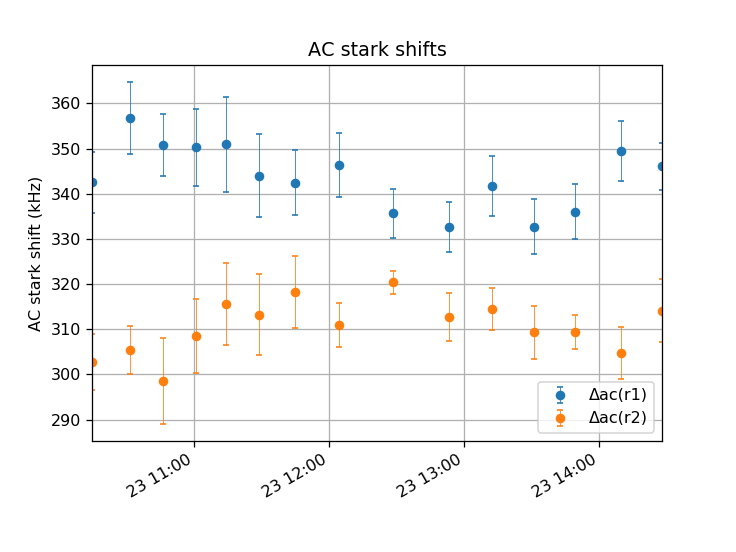

In [7]:
savefig=False
ratio_data=[]
ratio_error=[]
# avetimestamp=[]
timelength=[]
startingtime=[]
startingtime_in_UNIX=[]
# endtime=[]
# endtime_in_UNIX=[]
middletime=[]
# middletime_in_UNIX=[]

ROI1_ac=[]
ROI1_err=[]
ROI2_ac=[]
ROI2_err=[]

for i in range(0,len(assorted['exp_ids'])):
    startingtime.append(dt.datetime.fromtimestamp(assorted['timestamps'][i][0]))
    startingtime_in_UNIX.append(assorted['timestamps'][i][0])
    ratio_data.append(data11[i][2]/data11[i][4])
    error_total=np.sqrt(((1/data11[i][4])*data11[i][3])**2+(((data11[i][2]/(data11[i][4])**2)*data11[i][5])**2))
    ROI1_ac.append(data11[i][2])
    ROI1_err.append(data11[i][3])
    ROI2_ac.append(data11[i][4])
    ROI2_err.append(data11[i][5])
    ratio_error.append(error_total)
    middletime.append(dt.datetime.fromtimestamp(0.5*int(assorted['timestamps'][i][0]+assorted['timestamps'][i][-1])))

# Plotting by clock time
df=pd.DataFrame({ "Δac(r1)/Δac(r2)": ratio_data,'error': ratio_error
                 ,"Δac(r1)": ROI1_ac,'Δac(r2)':ROI2_ac, 'ROI1_err': ROI1_err, 'ROI2_err': ROI2_err
                 ,"middletime":middletime, "startingtime":startingtime
                },index=middletime)
ax=df.plot(y=[ "Δac(r1)/Δac(r2)"],yerr='error',capsize=2,alpha=1,lw=0.5,marker='o',markersize=4,linestyle='None',color=['#1f77b4', '#d62728'])
days=md.DayLocator()
hours=md.HourLocator()
#ax.set_xlim(dt.datetime(2018,5,22))
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(md.DateFormatter('%b %d'))
ax.set_ylabel('Ratio of AC stark shift')
ax.grid()
#plt.savefig('Alignment_20180415.png')

# AC stark shifts
ax=df.plot(y=["Δac(r1)"],yerr='ROI1_err',capsize=2,alpha=1,lw=0.5,marker='o',markersize=5,linestyle='None')
df.plot(y=["Δac(r2)"],yerr='ROI2_err',capsize=2,alpha=1,lw=0.5,marker='o',markersize=5,linestyle='None',ax=ax)
hours=md.HourLocator()
#ax.xaxis.set_major_locator(days)
#ax.xaxis.set_minor_locator(hours)
ax.xaxis.set_major_locator(hours)
#ax.xaxis.set_major_formatter(md.DateFormatter('%b %d'))
ax.set_ylabel('AC stark shift (kHz)')
ax.grid()
ax.set_title('AC stark shifts')
ax.legend()


In [8]:
# Plotting by Time difference

timediff=(startingtime_in_UNIX-startingtime_in_UNIX[0])/(3600)
fig, ax = plt.subplots()
#fig.set_size_inches(8,6)
ax.errorbar(timediff,ratio_data,yerr=ratio_error,capsize=2,alpha=1,lw=0.5,marker='o',markersize=4,linestyle='None')
ax.set_xlabel('Elapsed time(hours)',fontsize=20)
ax.set_ylabel('Raio of AC Stark shifts',fontsize=20)
ax.set_title('Ratio of AC stark shifts on two neighboring regions',fontsize=15)
#ax.set_ylim(-0.3,0.3)
ax.tick_params(labelsize=20)
ax.grid()
plt.tight_layout()
filename='AC Stark shift ratios'
if savefig:
    plt.savefig(filename+'.png')
    plt.savefig(filename+'.pdf')
    plt.savefig(filename+'.eps')

<IPython.core.display.Javascript object>

In [9]:
peakshift=825 # kHz
wx=8.1 # um
spacing = 9.25 # um

def gaussian2(x,amp,x0,sigma,offset):
    res=(amp*sp.exp((-2.0*(x-x0)**2)/(sigma**2)))+offset
    return res

ratio_to_dist=[]  
x=Symbol('x')
dist_max_error=[]
dist_min_error=[]
error_all=[]
for z in range(0,len(ratio_error)):
    print "doing {}-th fit.. out of {}".format(z,len(ratio_error))
    center_val = solve((gaussian2(x,peakshift,spacing/2,wx,0)/gaussian2(x,peakshift,-spacing/2,wx,0))-ratio_data[z],x)
    max_val = solve((gaussian2(x,peakshift,spacing/2,wx,0)/gaussian2(x,peakshift,-spacing/2,wx,0))-ratio_data[z]-ratio_error[z],x)
    min_val =  solve((gaussian2(x,peakshift,spacing/2,wx,0)/gaussian2(x,peakshift,-spacing/2,wx,0))-ratio_data[z]+ratio_error[z],x)
    ratio_to_dist.append(np.float(center_val[0]))
    maxerr = max_val[0] - center_val[0]
    minerr = center_val[0]- min_val[0]
    dist_max_error.append(np.float(maxerr))
    dist_min_error.append(np.float(minerr))
    error_all.append([np.float(maxerr),np.float(minerr)])

doing 0-th fit.. out of 15
doing 1-th fit.. out of 15
doing 2-th fit.. out of 15
doing 3-th fit.. out of 15
doing 4-th fit.. out of 15
doing 5-th fit.. out of 15
doing 6-th fit.. out of 15
doing 7-th fit.. out of 15
doing 8-th fit.. out of 15
doing 9-th fit.. out of 15
doing 10-th fit.. out of 15
doing 11-th fit.. out of 15
doing 12-th fit.. out of 15
doing 13-th fit.. out of 15
doing 14-th fit.. out of 15


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


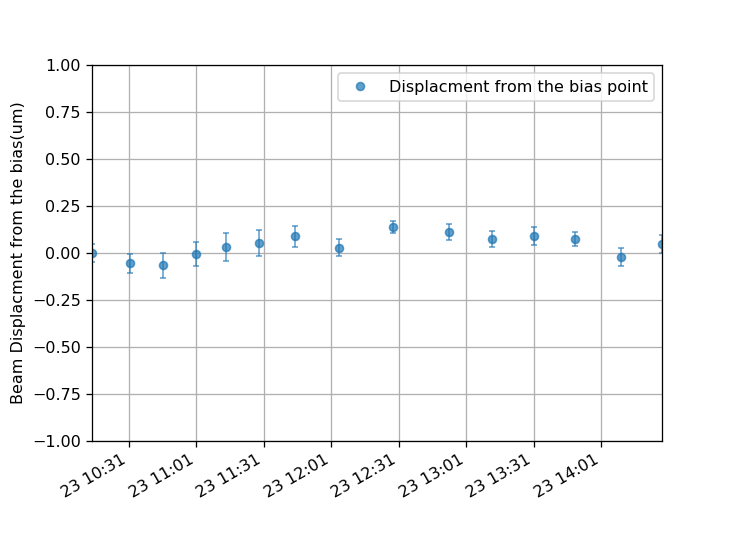

In [10]:
bias_point=np.array(ratio_to_dist[0])
displacement_frombias=(ratio_to_dist-bias_point)
df_displacement=pd.DataFrame({ "beam displacment": ratio_to_dist,"Displacment from the bias point":-displacement_frombias,'Max_error': dist_max_error,'Min_error': dist_min_error}
                             ,index=middletime)
ax=df_displacement.plot(y=["beam displacment"],yerr=[dist_max_error,dist_min_error],capsize=5,lw=0.5,marker='o',markersize=5,color=['#1f77b4', '#d62728'])
ax.set_ylabel('Beam Displacment from r1-r2 center (um)')
#ax.set_xlim(dt.datetime(2018,6,17,12),dt.datetime(2018,6,18,13,0))
ax.grid()
ax=df_displacement.plot(y=["Displacment from the bias point"],yerr=[dist_max_error,dist_min_error],capsize=2,lw=1,marker='o',alpha=0.7,linestyle='None',markersize=5,color=['#1f77b4', '#d62728'])
ax.set_ylabel('Beam Displacment from the bias(um)')
ax.set_ylim(-1,1)
ax.grid()

C:\Users\Rb\AppData\Local\Enthought\Canopy\User\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


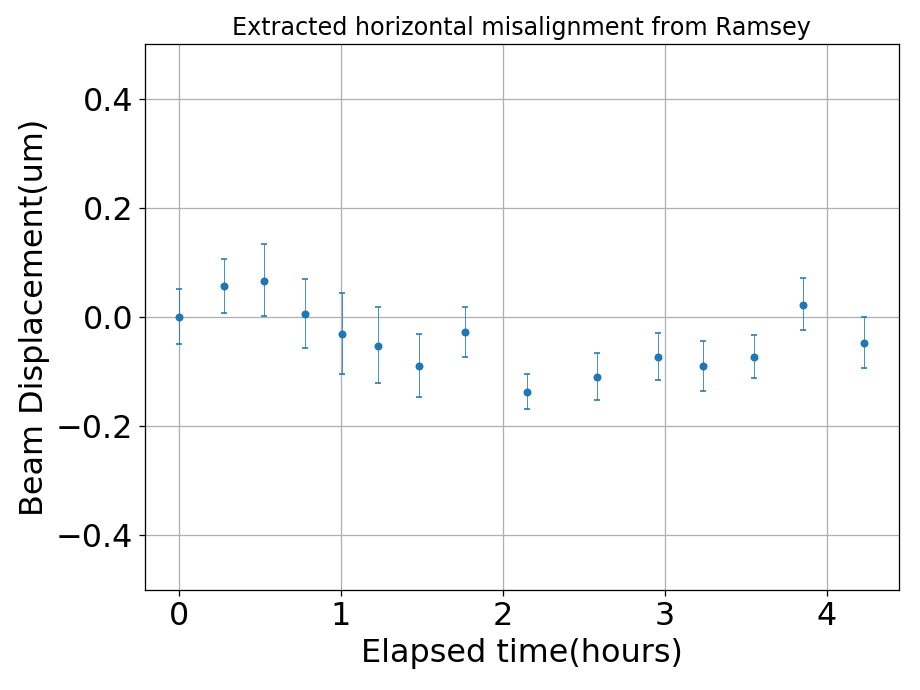

In [11]:
timediff=(startingtime_in_UNIX-startingtime_in_UNIX[0])/(3600)
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
ax.errorbar(timediff,displacement_frombias,yerr=[dist_max_error,dist_min_error],capsize=2,alpha=1,lw=0.5,marker='o',markersize=4,linestyle='None')
ax.set_xlabel('Elapsed time(hours)',fontsize=20)
ax.set_ylabel('Beam Displacement(um)',fontsize=20)
ax.set_title('Extracted horizontal misalignment from Ramsey',fontsize=15)
ax.set_ylim(-0.5,0.5)
ax.tick_params(labelsize=20)
ax.grid()
plt.tight_layout()
filename='Extracted_horizontal_misalignment_from_Ramsey'
# plt.savefig(filename+'.png')
# plt.savefig(filename+'.pdf')
# plt.savefig(filename+'.eps')

# TIME SERIES ANALYSES

In [12]:
keylist=['Red_camera_dataX',
 'Red_camera_dataY',
  'FORT_camera_dataX',
'FORT_camera_dataY',
         'AAS_redside',
         'AAS_blueside',
 'timestamp_measurements',
 'timestamp_iteration']

actuator_variables=['Red_X','Red_Y']

# exp_ids : This is list for Ramsey experiments.
# There are more experients with AAS on. Add them in this list
AAS_ids=[
        ]

entire_closed_ids=exp_ids+AAS_ids


data={}
for j in range(0,len(entire_closed_ids)):
    exp_id=entire_closed_ids[j]
    q=open_data(exp_id)
    e=0
    for i in q.experiments[e]['iterations']:
        for key in keylist:
            if i==0 and j==0:
                data[key]=[]
            try:
                data[key].append(q.experiments[e]['iterations'][i][key])
            except:
                print "error occured : exp {}, iter {}, key {}".format(exp_id, i, key)

        for var in actuator_variables:
            if i==0 and j==0:
                data[var]=[]
            try:
                data[var].append(q.experiments[e]['iterations'][i]['variables'][var])
            except:
                print "error occured : exp {}, iter {}, key {}".format(exp_id, i, var)
                

Yay! found old qdp class. We can save time!
qdp has been imported from :Y:/Analysis/2018_06_23/2018_06_23_10_07_33_Open loop Ramsey, temperature controlled box/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :Y:/Analysis/2018_06_23/2018_06_23_10_24_18_Open loop Ramsey, temperature controlled box/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :Y:/Analysis/2018_06_23/2018_06_23_10_39_15_Open loop Ramsey, temperature controlled box/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :Y:/Analysis/2018_06_23/2018_06_23_10_54_11_Open loop Ramsey, temperature controlled box/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :Y:/Analysis/2018_06_23/2018_06_23_11_07_59_Open loop Ramsey, temperature controlled box/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :Y:/Analysis/2018_06_23/2018_06_23_11_21_19_Open loop Ramsey, temperature controlled box/

<IPython.core.display.Javascript object>


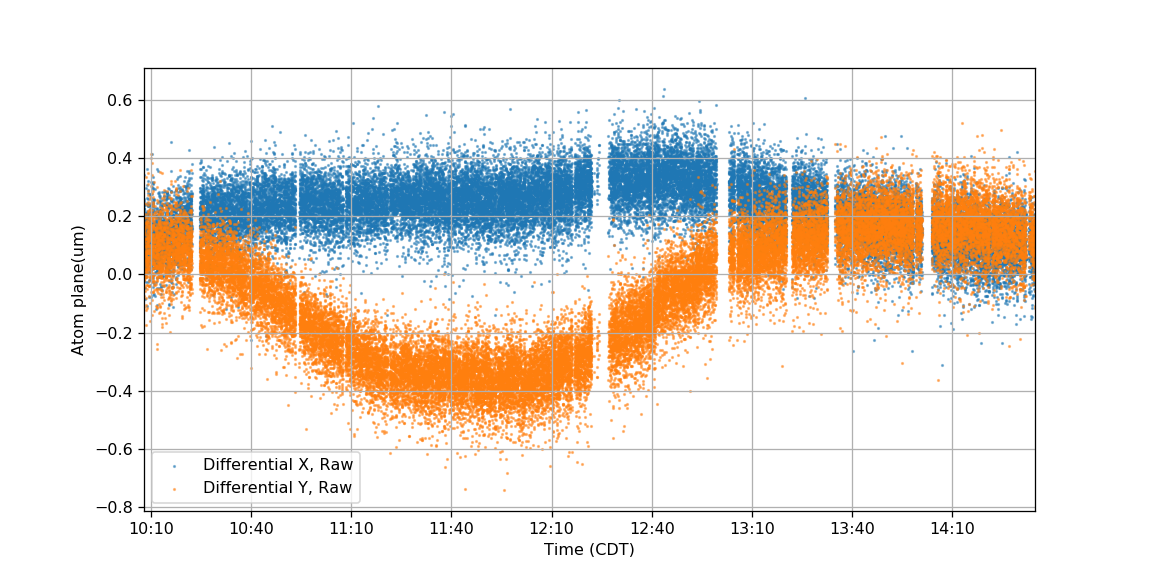

In [13]:
savefig=False
data_cutoff=0
xfmt=md.DateFormatter('%H:%M')
figW=10
figH=5
fig, ax = plt.subplots()
fig.set_size_inches(figW,figH)
flattendedtimestamps=np.array(flatten(data['timestamp_measurements']))
experiment_start_time=flattendedtimestamps[0]
dates=[dt.datetime.fromtimestamp(ts) for ts in flattendedtimestamps][data_cutoff:]

flatteneddata0=np.array(flatten(data[keylist[0]]))[data_cutoff:]
flatteneddata2=np.array(flatten(data[keylist[2]]))[data_cutoff:]
flatteneddata1=np.array(flatten(data[keylist[1]]))[data_cutoff:]
flatteneddata3=np.array(flatten(data[keylist[3]]))[data_cutoff:]

ax.xaxis.set_major_formatter(xfmt)
data_to_plot=flatteneddata0-flatteneddata2-(flatteneddata0[0]-flatteneddata2[0])
ax.scatter(dates,data_to_plot,s=1,alpha=0.5,label='Differential X, Raw')
ax.set_xlim(dates[0],dates[-1])
#ax.set_ylim(-1,1)

data_to_plot2=flatteneddata1-flatteneddata3-(flatteneddata1[0]-flatteneddata3[0])
ax.scatter(dates,data_to_plot2,s=1,alpha=0.5,label='Differential Y, Raw')
ax.grid()
ax.set_xlabel('Time (CDT)')
ax.set_ylabel('Atom plane(um)')
ax.legend()
if savefig:   
    plt.savefig('Alignment_over_night.png')

# Insert room temperature history

In [14]:
from numpy import genfromtxt
import pandas as pd
my_data=genfromtxt('Rb_labtemperature_20180623.csv',delimiter=',')
data_cutoff=0 # to cutoff bad data at the beginning
temperatures_in_C=np.array(my_data[data_cutoff:,1])
flattendedtimestamps_temp=np.array(my_data[data_cutoff:,0])/2**32
dates=[dt.datetime.fromtimestamp(ts) for ts in flattendedtimestamps_temp]
samplerate='1S'
df_temperature=pd.DataFrame({'System Temperature': temperatures_in_C,
                },index=dates)

data_to_plot2=df_temperature.resample(samplerate).mean()
ax=data_to_plot2.plot(y=['System Temperature'],alpha=1,lw=1,marker='.',markersize=0.02)
ax.set_ylabel('Temperature(C)')
ax.grid()
ax.legend()

<IPython.core.display.Javascript object>

In [15]:
cooking_starttime=dt.datetime(2018,6,23,9,48)
cooking_start_timestamp=time.mktime(cooking_starttime.timetuple())
timetable=np.linspace(cooking_start_timestamp,cooking_start_timestamp+240*60,25)
cookingtable=np.array([21.1, 20.9, 20.7, 20.5, 20.3, 20.1, 19.9, 19.9, 19.9, 19.9, 19.9, 19.9, 19.9, 20.1, 20.3, 20.5, 20.7, 20.9, 21.1,21.1, 21.1, 21.1, 21.1, 21.1, 21.1])


fig, ax=plt.subplots()
fig.set_size_inches(8,6)
offset_chiller=1.3
ax.plot((flattendedtimestamps_temp-experiment_start_time)/3600,temperatures_in_C,label='System temperature')
ax.step((timetable-experiment_start_time)/3600,cookingtable+offset_chiller,where='post',label='Chiller Setpoint +{} C'.format(offset_chiller))
ax.grid()
ax.set_xlabel('Elpased time (Hours)',fontsize=16)
ax.set_ylabel('Temperature (C)',fontsize=16)
ax.set_title('Box Temperature Recipe',fontsize=20)
ax.legend()
ax.set_xlim(-1,5)
ax.tick_params(labelsize=20)
plt.tight_layout()
savefig=False
if savefig:
    plt.savefig("20180618_Closedloop_Temperature Recipe.png")

<IPython.core.display.Javascript object>

# Camera data analysis

<IPython.core.display.Javascript object>


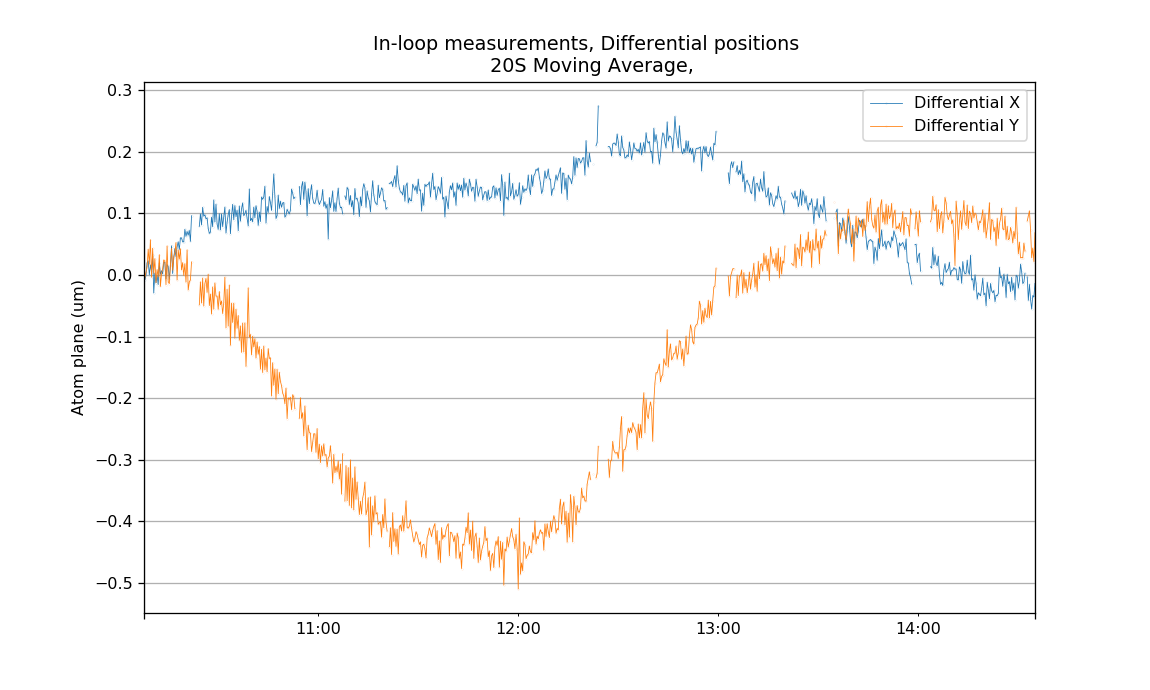

<IPython.core.display.Javascript object>


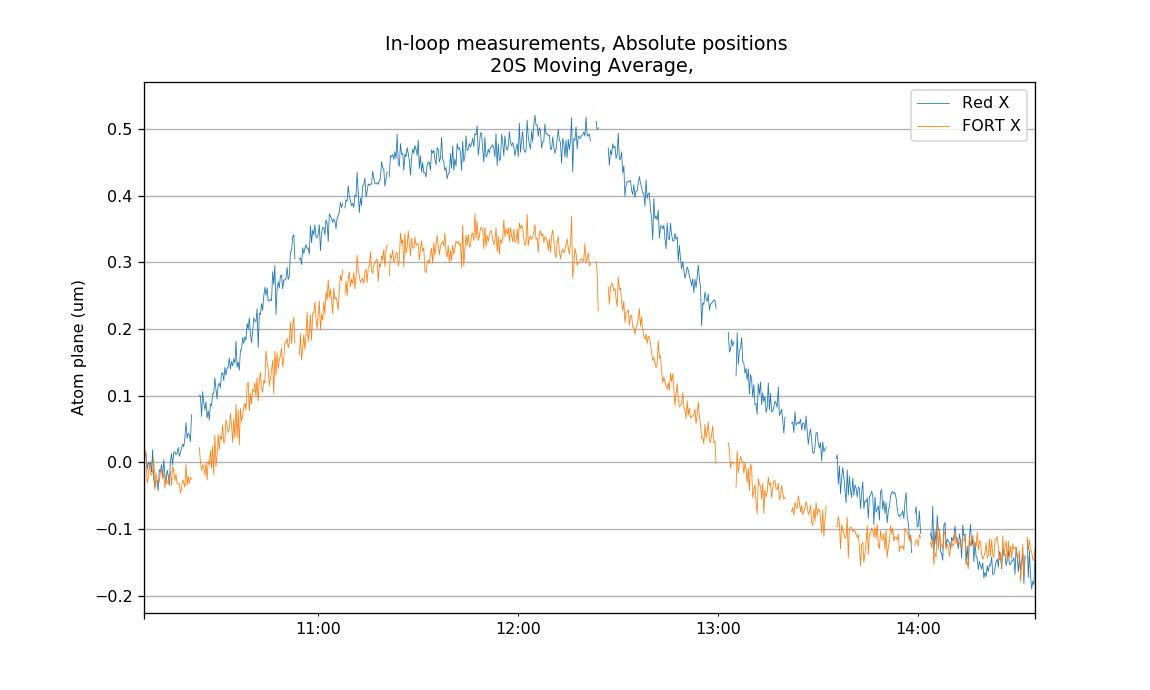

<IPython.core.display.Javascript object>


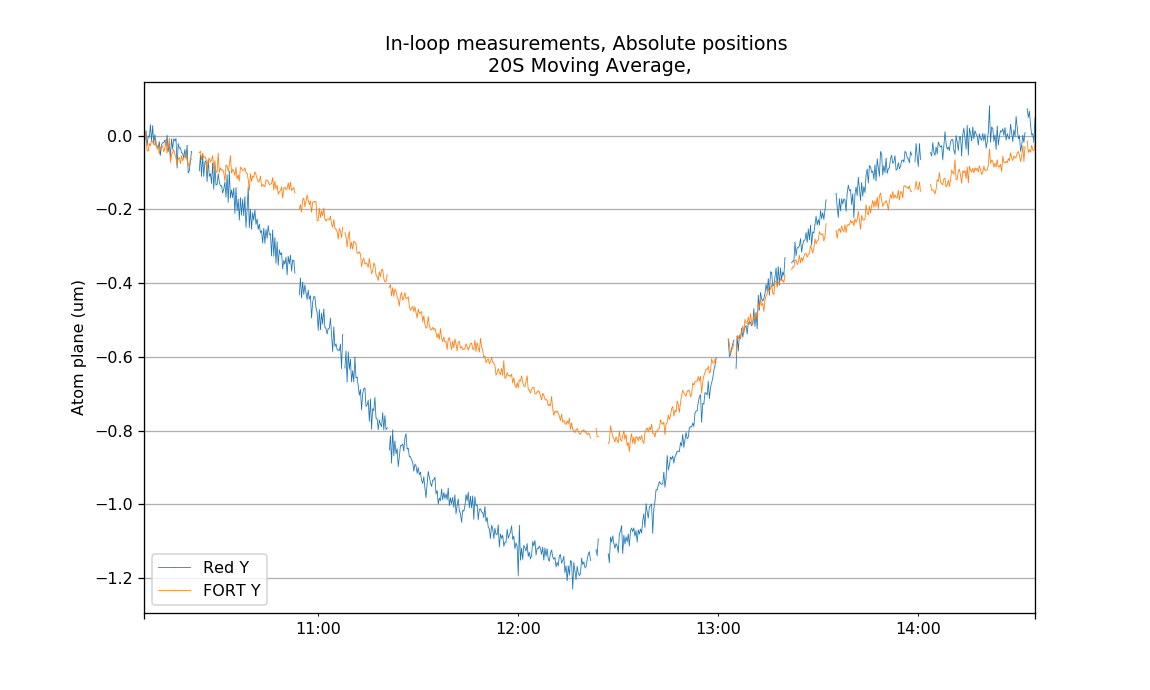

<IPython.core.display.Javascript object>

In [16]:
# Using Pandas
import pandas as pd
savefig=False
data_cutoff=0
flattendedtimestamps=np.array(flatten(data['timestamp_measurements']))

dates=[dt.datetime.fromtimestamp(ts) for ts in flattendedtimestamps][data_cutoff:]
dates_iterations=[dt.datetime.fromtimestamp(ts) for ts in data['timestamp_iteration']]

flatteneddata0=np.array(flatten(data[keylist[0]]))[data_cutoff:]
flatteneddata2=np.array(flatten(data[keylist[2]]))[data_cutoff:]
flatteneddata1=np.array(flatten(data[keylist[1]]))[data_cutoff:]
flatteneddata3=np.array(flatten(data[keylist[3]]))[data_cutoff:]

offset_Red_X=np.mean(flatteneddata0[0:100])#np.median(flatteneddata0)
offset_Red_Y=np.mean(flatteneddata1[0:100])#np.median(flatteneddata1)
offset_FORT_X=np.mean(flatteneddata2[0:100])#np.median(flatteneddata2)
offset_FORT_Y=np.mean(flatteneddata3[0:100])#np.median(flatteneddata3)

offsetX0=np.mean((flatteneddata0-flatteneddata2)[0:100])
offsetX_median=np.median(flatteneddata0-flatteneddata2)
offsetY0=np.mean((flatteneddata1-flatteneddata3)[0:100])
offsetY_median=np.median(flatteneddata1-flatteneddata3)
df_camera=pd.DataFrame({'Differential X': flatteneddata0-flatteneddata2-offsetX0,
                 'Differential Y': flatteneddata1-flatteneddata3-offsetY0,
                 'Red X': flatteneddata0-offset_Red_X,
                 'Red Y': flatteneddata1-offset_Red_Y,
                 'FORT X': flatteneddata2-offset_FORT_X,
                 'FORT Y': flatteneddata3-offset_FORT_Y,
                },index=dates)

df_actuators=pd.DataFrame({
                 'Actuator Red X':np.array(data['Red_X']),
                 'Actuator Red Y':np.array(data['Red_Y'])
                },index=dates_iterations)

samplerate='20S'
## 
data_to_plot2=df_camera.resample(samplerate).mean()
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
data_to_plot2.plot(y=['Differential X'],alpha=1,lw=0.5,marker='.',markersize=0.1,ax=ax)
data_to_plot2.plot(y=['Differential Y'],alpha=1,lw=0.5,marker='.',markersize=0.1,ax=ax)
ax.set_ylabel('Atom plane (um)')
ax.set_title('In-loop measurements, Differential positions \n {} Moving Average,'.format(samplerate))
ax.grid()
ax.legend()

##
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
data_to_plot2.plot(y=['Red X'],alpha=1,lw=0.5,marker='.',markersize=0.1,ax=ax)
data_to_plot2.plot(y=['FORT X'],alpha=1,lw=0.5,marker='.',markersize=0.1,ax=ax)
ax.set_ylabel('Atom plane (um)')
ax.set_title('In-loop measurements, Absolute positions \n {} Moving Average,'.format(samplerate))
ax.grid()
ax.legend()

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
data_to_plot2.plot(y=['Red Y'],alpha=1,lw=0.5,marker='.',markersize=0.1,ax=ax)
data_to_plot2.plot(y=['FORT Y'],alpha=1,lw=0.5,marker='.',markersize=0.1,ax=ax)
ax.set_ylabel('Atom plane (um)')
ax.set_title('In-loop measurements, Absolute positions \n{} Moving Average,'.format(samplerate))
ax.grid()
ax.legend()

data_to_plot3=df_actuators.resample(samplerate).mean()

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
data_to_plot3.plot(y=['Actuator Red X'],alpha=1,lw=0.2,marker='.',ax=ax)
data_to_plot3.plot(y=['Actuator Red Y'],alpha=1,lw=0.2,marker='.',ax=ax)
ax.set_title('In-loop variables'.format(samplerate))
ax.set_ylabel('Actuator(deg)')
ax.grid()
ax.legend()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


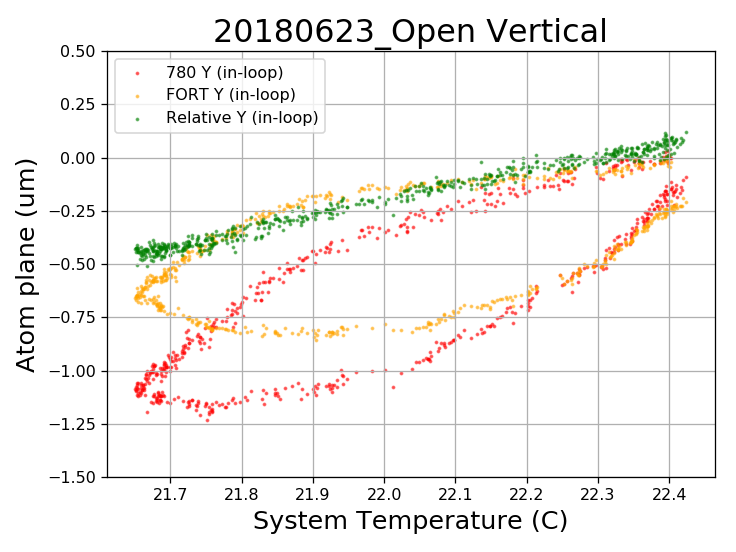

In [26]:
filename='20180623_Open'
savefig=False
frames=[df_temperature,df,df_displacement,df_camera]
result=pd.concat(frames)
samplerate='20S'
data_to_plot3=result.resample(samplerate).mean()
data_to_plot3['Displacment from the bias point']=data_to_plot3['Displacment from the bias point']
fig, ax = plt.subplots()
data_to_plot3.plot(kind='scatter',y='Red X',x='System Temperature',alpha=0.5,s=2,color='r',label='780 X (in-loop)',ax=ax)
data_to_plot3.plot(kind='scatter',y='FORT X',x='System Temperature',alpha=0.5,s=2,color='orange',ax=ax,label='FORT X (in-loop)')
data_to_plot3.plot(kind='scatter',y='Differential X',x='System Temperature',alpha=0.5,s=2,color='green',ax=ax,label='Relative X (in-loop)')
data_to_plot3.dropna().plot(y="Displacment from the bias point",yerr='Max_error',x='System Temperature',capsize=3,lw=1,marker='o',alpha=1,linestyle='--',markersize=5,ax=ax,label='Misalignment detected by atom, X\n(out-of-loop)')
#data_to_plot3.plot(y="Displacment from the bias point",yerr='Max_error',x='System Temperature',capsize=3,lw=1,marker='o',alpha=1,linestyle='--',markersize=5,ax=ax,label='Misalignment detected by atom, X\n(out-of-loop)')
#data_to_plot3.plot(y="Displacment from the bias point",x='System Temperature',capsize=2,lw=1,marker='o',alpha=0.7,linestyle='None',markersize=5,color=['#1f77b4', '#d62728'],ax=ax)
ax.set_ylabel('Atom plane (um)',fontsize=16)
ax.set_xlabel('System Temperature (C)',fontsize=16)
ax.grid()
ax.legend()
ax.set_xlim(21.2,22.6)
ax.set_ylim(-.25,0.75)
ax.set_title(filename+' Horizontal',fontsize=20)
plt.tight_layout()
if savefig:
    plt.savefig(filename+"_Xcurve.png")

fig, ax2 = plt.subplots()
data_to_plot3.plot(kind='scatter',y='Red Y',x='System Temperature',alpha=0.5,s=2,color='r',label='780 Y (in-loop)',ax=ax2)
data_to_plot3.plot(kind='scatter',y='FORT Y',x='System Temperature',alpha=0.5,s=2, color='orange',ax=ax2,label='FORT Y (in-loop)')
data_to_plot3.plot(kind='scatter',y='Differential Y',x='System Temperature',alpha=0.5,s=2, color='green',ax=ax2,label='Relative Y (in-loop)')
ax2.set_ylabel('Atom plane (um)',fontsize=16)
ax2.set_xlabel('System Temperature (C)',fontsize=16)
ax2.grid()
ax2.legend()
ax.set_xlim(21.6,22.5)
ax2.set_ylim(-1.5,0.5)
ax2.set_title(filename+' Vertical',fontsize=20)
plt.tight_layout()
if savefig:
    plt.savefig(filename+"_Ycurve.png")

<IPython.core.display.Javascript object>


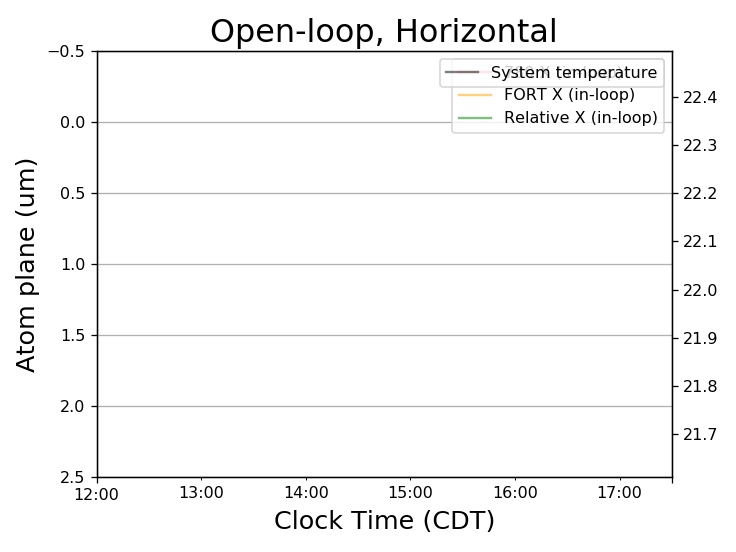

<IPython.core.display.Javascript object>


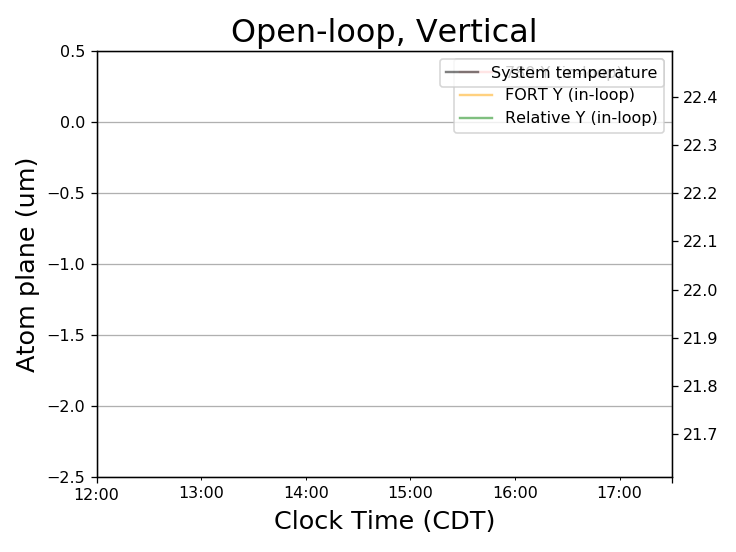

In [18]:
fig, ax = plt.subplots()
data_to_plot3.plot(y='Red X',alpha=0.5,color='r',label='780 X (in-loop)',ax=ax)
data_to_plot3.plot(y='FORT X',alpha=0.5,color='orange',ax=ax,label='FORT X (in-loop)')
data_to_plot3.plot(y='Differential X',alpha=0.5,color='green',ax=ax,label='Relative X (in-loop)')
ax.set_ylabel('Atom plane (um)',fontsize=16)
ax.set_xlabel('Clock Time (CDT)',fontsize=16)
ax2=ax.twinx()
data_to_plot3.plot(y='System Temperature',alpha=0.5,color='black',label='System temperature',ax=ax2)
#'System Temperature'
ax.grid()
ax.legend()
ax.set_xlim(dt.datetime(2018,6,17,12,0),dt.datetime(2018,6,17,17,30))
ax.set_ylim(2.5,-0.5)
ax.set_title('Open-loop, Horizontal',fontsize=20)
plt.tight_layout()

fig, ax = plt.subplots()
data_to_plot3.plot(y='Red Y',alpha=0.5,color='r',label='780 Y (in-loop)',ax=ax)
data_to_plot3.plot(y='FORT Y',alpha=0.5,color='orange',ax=ax,label='FORT Y (in-loop)')
data_to_plot3.plot(y='Differential Y',alpha=0.5,color='green',ax=ax,label='Relative Y (in-loop)')
ax.set_ylabel('Atom plane (um)',fontsize=16)
ax.set_xlabel('Clock Time (CDT)',fontsize=16)
ax2=ax.twinx()
data_to_plot3.plot(y='System Temperature',alpha=0.5,color='black',label='System temperature',ax=ax2)

ax.grid()
ax.legend()
ax.set_xlim(dt.datetime(2018,6,17,12,0),dt.datetime(2018,6,17,17,30))
ax.set_ylim(-2.5,0.5,)
ax.set_title('Open-loop, Vertical',fontsize=20)
plt.tight_layout()

In [19]:
data_to_plot3.dropna()

Differential X  Differential Y  \
2018-06-23 10:14:40        0.016688        0.046983   
2018-06-23 10:31:20        0.078457       -0.062647   
2018-06-23 10:46:00        0.104616       -0.196394   
2018-06-23 11:00:40        0.118828       -0.304469   
2018-06-23 11:14:00        0.141330       -0.336197   
2018-06-23 11:28:40        0.142592       -0.433200   
2018-06-23 11:44:40        0.142531       -0.418103   
2018-06-23 12:04:20        0.143667       -0.418154   
2018-06-23 12:28:20        0.212391       -0.270071   
2018-06-23 12:53:20        0.204791       -0.081243   
2018-06-23 13:12:20        0.135526       -0.006174   
2018-06-23 13:31:00        0.107811        0.043485   

                     Displacment from the bias point    FORT X    FORT Y  \
2018-06-23 10:14:40                         0.100000 -0.028257 -0.046594   
2018-06-23 10:31:20                         0.043708  0.056244 -0.093115   
2018-06-23 10:46:00                         0.033805  0.137952 -0.129753   
2018-06-23 11:00:40                         0.094672  0.198766 -0.222100   
2018-06-23 11:14:00                         0.131510  0.285037 -0.348459   
2018-06-23 11:28:40                         0.153055  0.321053 -0.476822   
2018-06-23 11:44:40                         0.189146  0.325560 -0.572586   
2018-06-23 12:04:20                         0.128282  0.337426 -0.682923   
2018-06-23 12:28:20                         0.236838  0.265439 -0.815794   
2018-06-23 12:53:20                         0.209658  0.057851 -0.665892   
2018-06-23 13:12:20                         0.172412 -0.033479 -0.467176   
2018-06-23 13:31:00                         0.190298 -0.105047 -0.268648   

                     Max_error  Min_error   ROI1_err  ROI2_err     Red X  \
2018-06-23 10:14:40   0.049964   0.051413   6.770320  6.248050 -0.011570   
2018-06-23 10:31:20   0.049414   0.050831   7.962500  5.290649  0.134701   
2018-06-23 10:46:00   0.064861   0.067323   6.906484  9.442369  0.242568   
2018-06-23 11:00:40   0.062760   0.065063   8.555106  8.171204  0.317594   
2018-06-23 11:14:00   0.072189   0.075253  10.505502  9.093798  0.426367   
2018-06-23 11:28:40   0.068572   0.071330   9.235469  9.045082  0.463645   
2018-06-23 11:44:40   0.056906   0.058793   7.172395  7.953710  0.468092   
2018-06-23 12:04:20   0.045053   0.046228   7.074945  4.869145  0.481093   
2018-06-23 12:28:20   0.031664   0.032240   5.421142  2.557600  0.477831   
2018-06-23 12:53:20   0.041856   0.042868   5.529837  5.363466  0.262642   
2018-06-23 13:12:20   0.042858   0.043919   6.601032  4.718729  0.102047   
2018-06-23 13:31:00   0.046000   0.047225   6.068521  5.853522  0.002764   

                        Red Y  System Temperature  beam displacment     error  \
2018-06-23 10:14:40  0.000390           22.356806          0.219292  0.032339   
2018-06-23 10:31:20 -0.155762           22.202602          0.275584  0.033010   
2018-06-23 10:46:00 -0.326147           22.040827          0.285487  0.043762   
2018-06-23 11:00:40 -0.526569           21.883556          0.224620  0.040892   
2018-06-23 11:14:00 -0.684656           21.786818          0.187782  0.046191   
2018-06-23 11:28:40 -0.910022           21.715899          0.166238  0.043303   
2018-06-23 11:44:40 -0.990689           21.676141          0.130146  0.035095   
2018-06-23 12:04:20 -1.101077           21.682162          0.191010  0.028659   
2018-06-23 12:28:20 -1.085865           21.847524          0.082454  0.018875   
2018-06-23 12:53:20 -0.747134           22.161895          0.109635  0.025408   
2018-06-23 13:12:20 -0.473350           22.316511          0.146880  0.026576   
2018-06-23 13:31:00 -0.225164           22.382121          0.128995  0.028263   

                        Δac(r1)  Δac(r1)/Δac(r2)     Δac(r2)  
2018-06-23 10:14:40  342.553407         1.131639  302.705463  
2018-06-23 10:31:20  356.689506         1.168140  305.348304  
2018-06-23 10:46:00  350.729122         1.174681  298.573803  
2018-06-23 11:00:40  

<IPython.core.display.Javascript object>


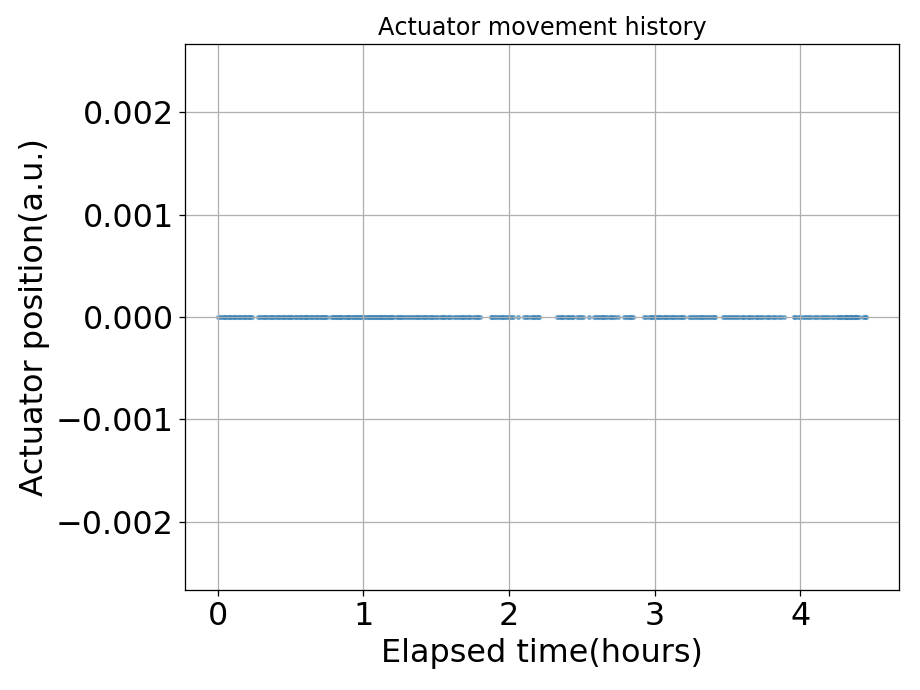

<IPython.core.display.Javascript object>


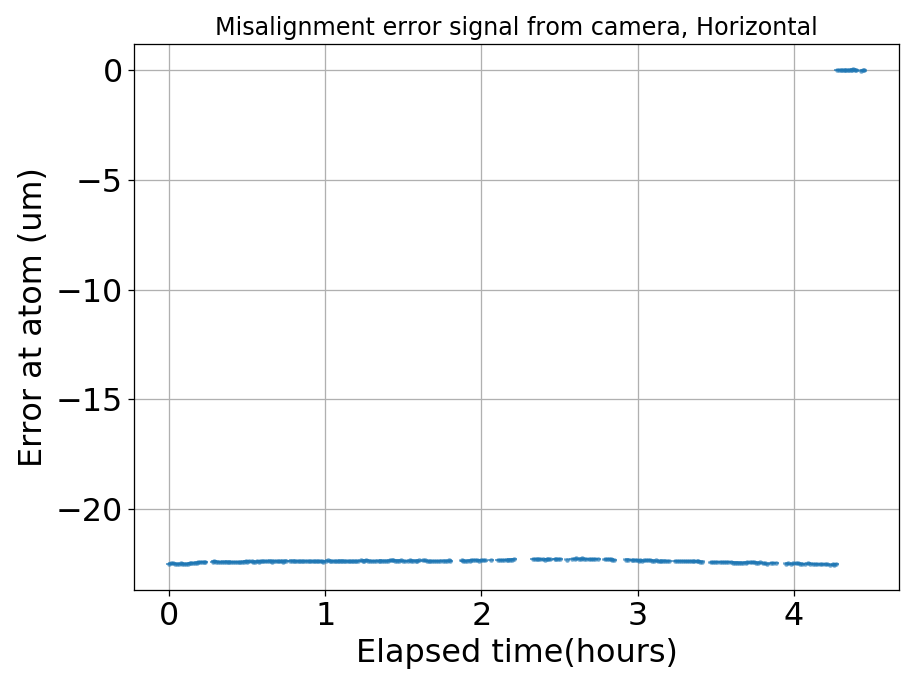

In [20]:
## Actuator Plot
savefig=False
actuator_x=np.array(data['Red_X'])
elapsed_time_in_hours=np.array(data['timestamp_iteration'])/3600.0-np.array(data['timestamp_iteration'][0])/3600.0

fig, ax = plt.subplots()
fig.set_size_inches(8,6)
plt.scatter(elapsed_time_in_hours,actuator_x-actuator_x[0],alpha=0.5,s=5)
ax.set_xlabel('Elapsed time(hours)',fontsize=20)
ax.set_ylabel('Actuator position(a.u.)',fontsize=20)
ax.set_title('Actuator movement history',fontsize=15)
ax.tick_params(labelsize=20)
ax.grid()
plt.tight_layout()
filename='Actuator X History'
if savefig:
    plt.savefig(filename+'.png')
    plt.savefig(filename+'.pdf')
    plt.savefig(filename+'.eps')

############ Camera error signal, X
camera_error_x=[]
camera_error_sigma_x=[]

samples=100
calibration_factor=12.0
elapsed_time_in_hours=np.array(data['timestamp_iteration'])/3600.0-np.array(data['timestamp_iteration'][0])/3600.0
for i in range(0,len(data[keylist[4]])):
    try:
        camera_error_x.append(data[keylist[4]][i]['error_x']/calibration_factor)
        camera_error_sigma_x.append(data[keylist[4]][i]['sigma_x']/math.sqrt(samples))
    except:
        print i
        camera_error_x.append(np.nan)
        camera_error_sigma_x.append(np.nan)
        
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
ax.errorbar(elapsed_time_in_hours,camera_error_x,yerr=camera_error_sigma_x,capsize=2,alpha=0.5,lw=0.5,marker='o',markersize=2,linestyle='None')
ax.set_xlabel('Elapsed time(hours)',fontsize=20)
ax.set_ylabel('Error at atom (um)',fontsize=20)
ax.set_title('Misalignment error signal from camera, Horizontal',fontsize=15)
ax.tick_params(labelsize=20)
ax.grid()
plt.tight_layout()
filename='Camera AAS X History'
if savefig:
    plt.savefig(filename+'.png')
    plt.savefig(filename+'.pdf')
    plt.savefig(filename+'.eps')

<IPython.core.display.Javascript object>


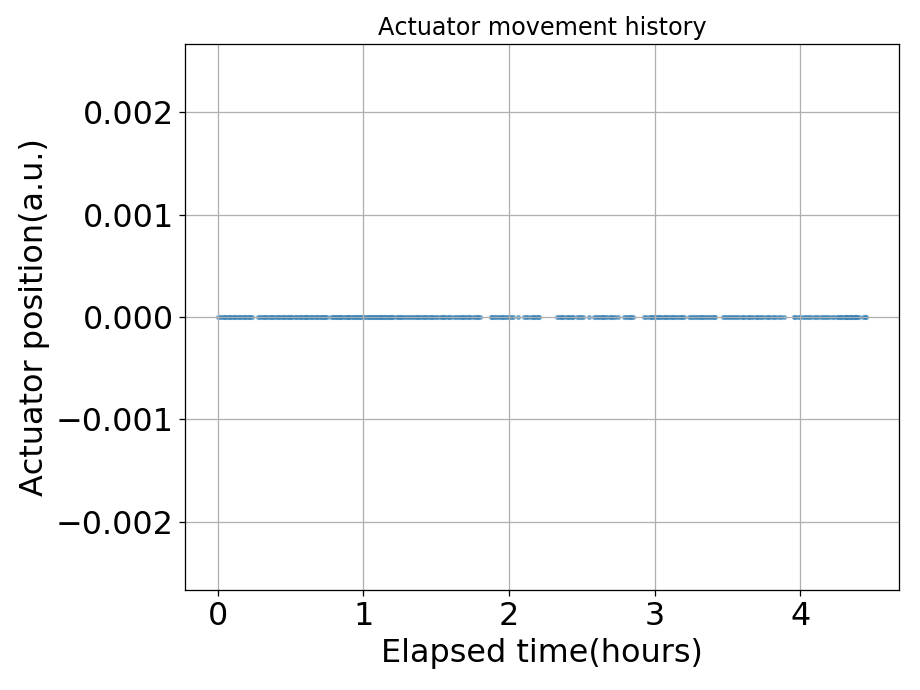

<IPython.core.display.Javascript object>


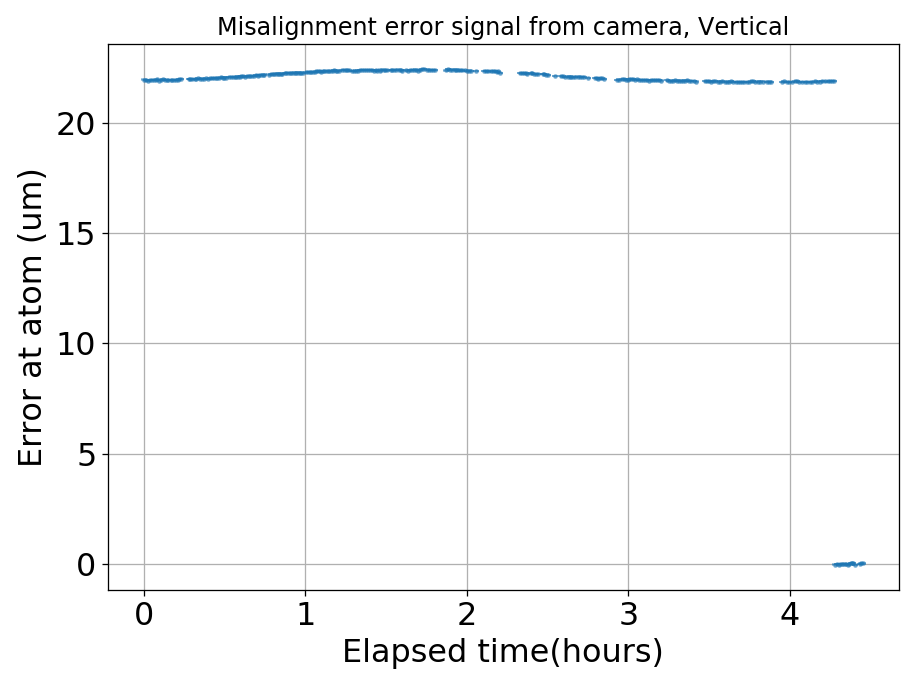

In [21]:
## Actuator Plot
savefig=False
actuator_y=np.array(data['Red_Y'])
elapsed_time_in_hours=np.array(data['timestamp_iteration'])/3600.0-np.array(data['timestamp_iteration'][0])/3600.0

fig, ax = plt.subplots()
fig.set_size_inches(8,6)
plt.scatter(elapsed_time_in_hours,actuator_y-actuator_y[0],alpha=0.5,s=5)
ax.set_xlabel('Elapsed time(hours)',fontsize=20)
ax.set_ylabel('Actuator position(a.u.)',fontsize=20)
ax.set_title('Actuator movement history',fontsize=15)
ax.tick_params(labelsize=20)
ax.grid()
plt.tight_layout()
filename='Actuator Y History'
if savefig:
    plt.savefig(filename+'.png')
    plt.savefig(filename+'.pdf')
    plt.savefig(filename+'.eps')

############ Camera error signal, Y
camera_error_y=[]
camera_error_sigma_y=[]

samples=100
calibration_factor=12.0
elapsed_time_in_hours=np.array(data['timestamp_iteration'])/3600.0-np.array(data['timestamp_iteration'][0])/3600.0
for i in range(0,len(data[keylist[4]])):
    try:
        camera_error_y.append(data[keylist[4]][i]['error_y']/calibration_factor)
        camera_error_sigma_y.append(data[keylist[4]][i]['sigma_y']/math.sqrt(samples))
    except:
        print i
        camera_error_y.append(np.nan)
        camera_error_sigma_y.append(np.nan)
        
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
ax.errorbar(elapsed_time_in_hours,camera_error_y,yerr=camera_error_sigma_y,capsize=2,alpha=0.5,lw=0.5,marker='o',markersize=2,linestyle='None')
ax.set_xlabel('Elapsed time(hours)',fontsize=20)
ax.set_ylabel('Error at atom (um)',fontsize=20)
ax.set_title('Misalignment error signal from camera, Vertical',fontsize=15)
ax.tick_params(labelsize=20)
ax.grid()
plt.tight_layout()
filename='Camera AAS Y History'
if savefig:
    plt.savefig(filename+'.png')
    plt.savefig(filename+'.pdf')
    plt.savefig(filename+'.eps')

# Figuring out the dead region

<IPython.core.display.Javascript object>


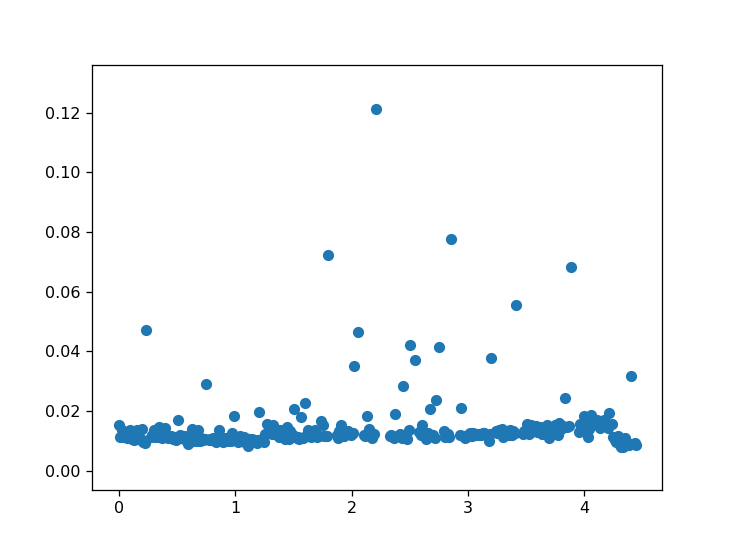

In [22]:
fig, ax= plt.subplots()
sorted_times=np.sort(elapsed_time_in_hours)
dead_times=sorted_times[1:]-sorted_times[0:-1]
ax.scatter(sorted_times[0:-1],dead_times)
threshold=2
dead_T=[]
dead_duration=[]
for i in range(0,len(dead_times)):
    if dead_times[i]>threshold:
        print 'T={}, duration of :{}'.format(sorted_times[0:-1][i],dead_times[i])
        dead_T.append(sorted_times[0:-1][i])
        dead_duration.append(dead_times[i])

<IPython.core.display.Javascript object>


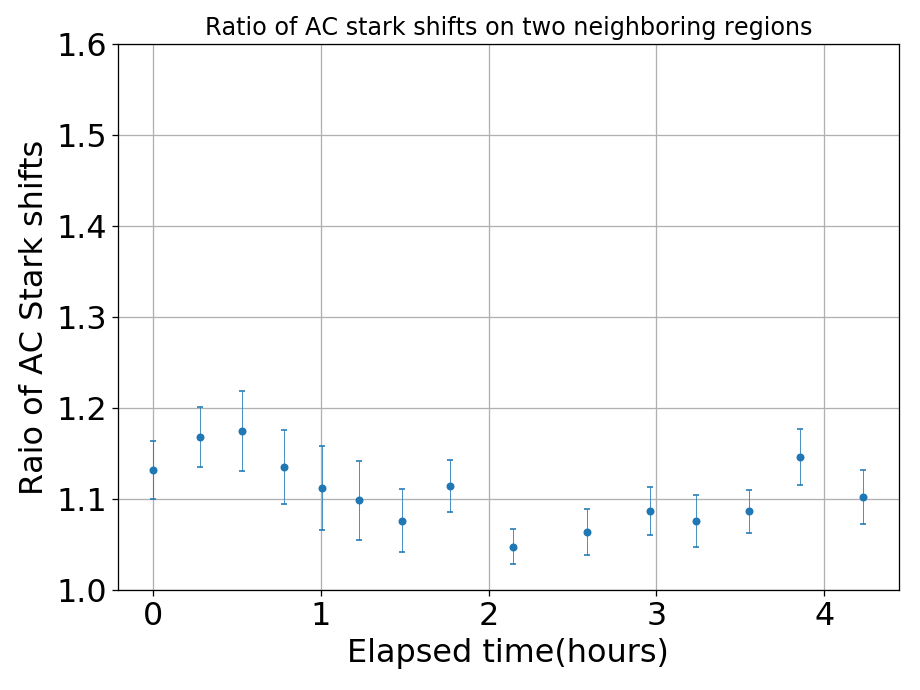

In [23]:
correction=0.7
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
ax.errorbar(timediff,ratio_data,yerr=ratio_error,capsize=2,alpha=1,lw=0.5,marker='o',markersize=4,linestyle='None')
ax.set_xlabel('Elapsed time(hours)',fontsize=20)
ax.set_ylabel('Raio of AC Stark shifts',fontsize=20)
ax.set_title('Ratio of AC stark shifts on two neighboring regions',fontsize=15)
# for i in range(0,len(dead_T)):
#     ax.fill_between([dead_T[i]+correction,dead_T[i]+dead_duration[i]-correction],1.1-0.3,1.1+0.3,alpha=0.1,color='r')
ax.set_ylim(1.3-0.3,1.3+0.3)
ax.tick_params(labelsize=20)
ax.grid()
plt.tight_layout()

# Allan deviation

In [24]:
from IPython.display import display, clear_output
name='20180615_openloop_boxtesting'
# Allan 
tau_list=range(1,100)+range(101,1001,10)+range(1002,10002,10)+range(10003,100003,10)#+range(80004,100004,50)+range(100005,1000005,500)
samplerates=[]
for i in tau_list:
    samplerates.append('{}S'.format(i))
        
samplerate='1S'

var_list={}

original_resampled=df.resample(samplerate).mean()

for i in range(0,len(tau_list)):
    avg_samplerate=samplerates[i]
    tau=tau_list[i]
    clear_output()
    display('Tau: '+str(tau))
    try:
        downsampled=df.resample(avg_samplerate).mean() # Takes block-average for given time chuck size
        for key in downsampled:
            values=downsampled[key].values
            Xtau=values[1:]
            Xo=values[0:-1]
            var=np.nanmean(np.abs(Xtau-Xo))
            if i==0:
                var_list[key]=[]
            var_list[key].append(var)
    except:
        pass
    
try:
    np.save(name+'_taulist',tau_list)
    np.save(name+'_X',np.sqrt(0.5*np.array(var_list['Differential X'])))
    np.save(name+'_Y',np.sqrt(0.5*np.array(var_list['Differential Y'])))
except:
    pass

'Tau: 99993'

<IPython.core.display.Javascript object>


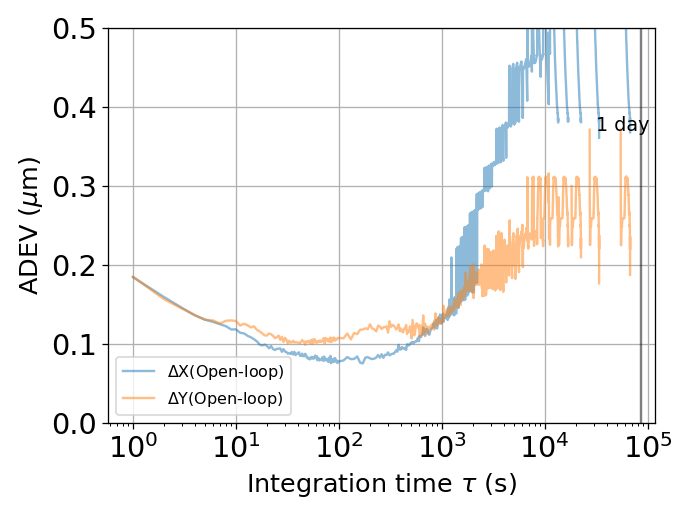

In [25]:
tau_list=np.load(name+'_taulist.npy')
Xlist=np.load(name+'_X.npy')
Ylist=np.load(name+'_Y.npy')

# tau_list2=np.load('20180525_closedloop_taulist.npy')
# Xlist2=np.load('20180525_closedloop_X.npy')
# Ylist2=np.load('20180525_closedloop_Y.npy')


savefig=False
fig, ax = plt.subplots()
fig.set_size_inches(6,4.5)
ax.semilogx(tau_list, Xlist,label=r'$\Delta$X(Open-loop)',alpha=0.5)
ax.semilogx(tau_list, Ylist,label=r'$\Delta$Y(Open-loop)',alpha=0.5)
# ax.semilogx(tau_list2, Xlist2,label=r'$\Delta$X(Closed-loop)',alpha=0.5)
# ax.semilogx(tau_list2, Ylist2,label=r'$\Delta$Y(Closed-loop)',alpha=0.5)
ax.tick_params(labelsize=18)
ax.legend()
plt.axvline(x=86400,color='black',alpha=0.5)
#ax.set_xlim(1,)
#ax.set_title('Allan Deviation (Open-loop vs Closed-loop)',size=)
ax.set_xlabel(r'Integration time $\tau$ (s)',size=16)
ax.set_ylabel(r'ADEV ($\mu$m)',size=16)
#ax.text(10**0,0.3,'Feedback uses last 100 measurements(~ 30 sec)\n from each iteration.\nFeedback cycle time typically ~ 2 min, when activated')
ax.text(10**4.5,0.37,'1 day',size=12)
#ax.axvline(x=60,color='k',alpha=0.3)
ax.set_ylim(0.0,0.5)
ax.grid()
plt.tight_layout()
filename='20180522_AllanDeviation_comparison'
if savefig:
    plt.savefig(filename+'.png')
    plt.savefig(filename+'.pdf')
    plt.savefig(filename+'.eps')
